# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
api_key = '05c56b4405b3fde15b801034b905b134'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

In [3]:
# confirm list of cities is non-repeating 
s = set(cities)
len(s)

617

In [4]:
cities[0]

'kushima'

In [5]:
cities[-1]

'batesville'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city = cities[0] 
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}'
response = requests.get(url).json()

In [7]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': 31.5, 'lon': 131.29},
 'dt': 1569689868,
 'id': 1895695,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 295.93,
          'temp_max': 295.93,
          'temp_min': 295.93},
 'name': 'Kushima',
 'sys': {'country': 'JP',
         'id': 47743,
         'message': 0.0062,
         'sunrise': 1569704805,
         'sunset': 1569747839,
         'type': 3},
 'timezone': 32400,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 5.36}}


In [8]:
response.get('wind').get('speed')

5.36

In [9]:
min(5, 2)

2

In [10]:
Cloudiness = []
Humidity = []
Wind_Speed = []
Max_Temp = []
Name = []
Lat = []
Lon = []

for num, city in enumerate(cities):
    # Make API call
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}'
    response = requests.get(url).json()
    
    # Test whether call was successful
    if response.get('cod') == '404':
        print(f'ERROR: could not find record for {city}, city #{num}')
    else:
        print(f'Recording values for {city}, city #{num}.')
        
        Name.append(city)
        
        # Temperature
        if response.get('main').get('temp_max') is not None:
            # Convert temp from Kelvin to Fahrenheit
            temp = round((response.get('main').get('temp_max') - 273.15) * 9/5 + 32, 2)
            Max_Temp.append(temp)
        else:
            Max_Temp.append(0)

        # Humidity
        if response.get('main').get('humidity') is not None:
            humidity = min(round(response.get('main').get('humidity'), 0), 100.00)
            Humidity.append(humidity)
        else:
            Humidity.append(0)

        # Cloudiness
        if response.get('clouds').get('all') is not None:
            clouds = min(response.get('clouds').get('all'), 100)
            Cloudiness.append(clouds)
        else:
            Cloudiness.append(0)

        # Wind
        if response.get('wind').get('speed') is not None:
            wind = round(response.get('wind').get('speed'), 2)
            Wind_Speed.append(wind)
        else:
            Wind_Speed.append(0)

        # Latitude
        if response.get('coord').get('lat') is not None:
            latitude = response.get('coord').get('lat')
            Lat.append(latitude)
        else:
            Lat.append(0)

        # Longitude
        if response.get('coord').get('lon') is not None:
            longitude = response.get('coord').get('lon')
            Lon.append(longitude)

Recording values for kushima, city #0.
Recording values for vanavara, city #1.
Recording values for mataura, city #2.
Recording values for portales, city #3.
ERROR: could not find record for illoqqortoormiut, city #4
Recording values for ushuaia, city #5.
Recording values for port elizabeth, city #6.
Recording values for faanui, city #7.
Recording values for samarai, city #8.
Recording values for hilo, city #9.
Recording values for east london, city #10.
Recording values for jamestown, city #11.
Recording values for new norfolk, city #12.
Recording values for punta arenas, city #13.
Recording values for hirara, city #14.
Recording values for ribeira grande, city #15.
Recording values for rikitea, city #16.
Recording values for san patricio, city #17.
Recording values for pangody, city #18.
Recording values for tuktoyaktuk, city #19.
Recording values for flin flon, city #20.
Recording values for narrabri, city #21.
Recording values for vaini, city #22.
Recording values for zhangye, city

Recording values for babanka, city #192.
Recording values for namatanai, city #193.
Recording values for bhinmal, city #194.
Recording values for dudinka, city #195.
Recording values for dhidhdhoo, city #196.
Recording values for san juan, city #197.
Recording values for koutiala, city #198.
Recording values for port alfred, city #199.
Recording values for chicama, city #200.
Recording values for chute-aux-outardes, city #201.
ERROR: could not find record for mocambique, city #202
Recording values for maltahohe, city #203.
Recording values for mitsamiouli, city #204.
Recording values for sonqor, city #205.
Recording values for plouzane, city #206.
Recording values for torbay, city #207.
Recording values for kahului, city #208.
Recording values for walvis bay, city #209.
Recording values for kamaishi, city #210.
Recording values for sakaiminato, city #211.
Recording values for codrington, city #212.
Recording values for jacobina, city #213.
ERROR: could not find record for sentyabrskiy,

Recording values for grammatikou, city #381.
Recording values for marawi, city #382.
Recording values for bolotesti, city #383.
Recording values for port hardy, city #384.
Recording values for uray, city #385.
Recording values for primorsko, city #386.
Recording values for nemuro, city #387.
Recording values for lakatoro, city #388.
Recording values for esperance, city #389.
Recording values for shelburne, city #390.
Recording values for kaitangata, city #391.
Recording values for nanortalik, city #392.
Recording values for tawau, city #393.
Recording values for galveston, city #394.
Recording values for touros, city #395.
Recording values for quelimane, city #396.
Recording values for port-gentil, city #397.
Recording values for hamilton, city #398.
Recording values for mareeba, city #399.
Recording values for sassandra, city #400.
Recording values for poronaysk, city #401.
Recording values for tura, city #402.
Recording values for yerbogachen, city #403.
Recording values for praia da

Recording values for constitucion, city #569.
Recording values for poum, city #570.
Recording values for dashitou, city #571.
Recording values for lokosovo, city #572.
Recording values for borisoglebskiy, city #573.
Recording values for lagoa, city #574.
Recording values for manaure, city #575.
Recording values for mezhova, city #576.
Recording values for ulladulla, city #577.
Recording values for iguape, city #578.
Recording values for raymond, city #579.
Recording values for wagar, city #580.
Recording values for sept-iles, city #581.
Recording values for reporoa, city #582.
Recording values for birjand, city #583.
Recording values for fairlie, city #584.
ERROR: could not find record for karamay, city #585
Recording values for ratholo, city #586.
Recording values for sharkan, city #587.
Recording values for buin, city #588.
Recording values for yenagoa, city #589.
Recording values for araouane, city #590.
ERROR: could not find record for lolua, city #591
Recording values for carauari

In [11]:
len(Lat)

553

In [12]:
len(Lon)

553

In [13]:
len(Name)

553

In [14]:
len(Max_Temp)

553

In [15]:
len(Cloudiness)

553

In [16]:
len(Humidity)

553

In [17]:
len(Wind_Speed)

553

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
df = pd.DataFrame(Name, columns=['Name'])
df['Lat'] = Lat
df['Lon'] = Lon
df['Temp'] = Max_Temp
df['Cloudiness'] = Cloudiness
df['Humidity'] = Humidity
df['Wind'] = Wind_Speed

In [19]:
df

,Name,Lat,Lon,Temp,Cloudiness,Humidity,Wind
0,kushima,31.50,131.29,73.00,60,78,5.36
1,vanavara,60.35,102.28,31.13,100,97,4.63
2,mataura,-46.19,168.86,48.99,95,76,3.58
3,portales,34.19,-103.33,77.00,1,64,5.10
4,ushuaia,-54.81,-68.31,55.40,75,43,2.10
5,port elizabeth,39.31,-74.98,84.99,40,65,4.60
6,faanui,-16.48,-151.75,79.01,12,83,7.73
7,samarai,-10.62,150.67,74.15,90,95,2.23
8,hilo,19.71,-155.08,75.20,20,60,1.50
9,east london,-33.02,27.91,68.00,20,88,3.10


In [20]:
df.to_csv('results.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

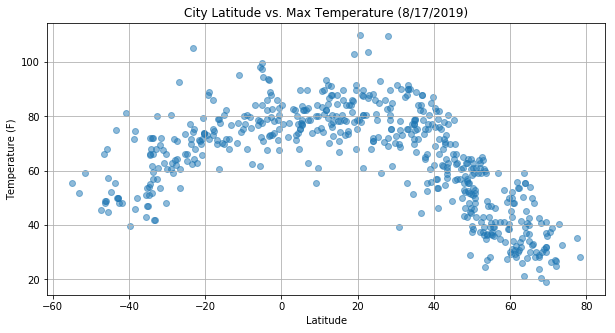

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(Lat, Max_Temp, alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Max Temperature (8/17/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temp.png')

#### Latitude vs. Humidity Plot

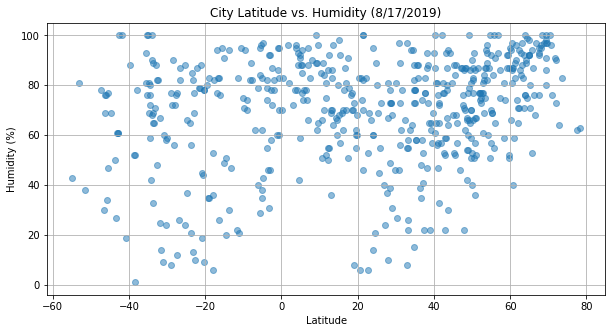

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(Lat, Humidity, alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Humidity (8/17/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity.png')

#### Latitude vs. Cloudiness Plot

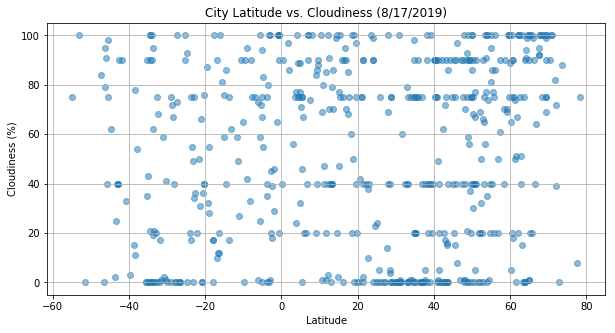

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(Lat, Cloudiness, alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Cloudiness (8/17/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

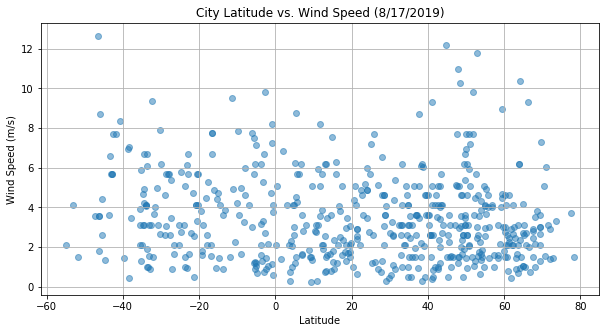

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(Lat, Wind_Speed, alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Wind Speed (8/17/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig('Wind.png')

Just to state the obvious, weather data is enormously complex, and any rigorous attempt to understand it would need to use typical meterological data and account for time of year, time of day, etc. Since I'm using the free account of the API, this study doesn't even attempt to do that...

# Observations

1. Temperature generally rises as Latitude approaches the equator, but the highest temperatures recorded are slightly North. This is likely due to cities in Northern Africa and could be confirmed by comparing with Longitude. 


2. Humidity is recorded near 100% across Latitudes. While not specified in the API, it is clear from the values approaching 100 that this is a measurement of relative (not absolute) humidity. If it were absolute humidity, we would likely see the highest values near the equator. Not that some of the lowest values for Humidity are just north of the equator, and are likely the same cities with the highest temperature (which would confirm the hypothesis that these cities are in Northern Africa). Again, these could be easily confirmed through additional exploration. 


3. While the results from Wind Speed are certainly not strong enough to be conclusive, there is a suggstion of higher wind speeds in the far northern and southern latitudes. 10 m/s winds are very strong, and 16 m/s winds are extreme. Wind speeds have enormous fluctuations throughout the day (let alone the year), so it would be interesting to collect more hourly data for these cities, from either EPW or TMY files, and develop a fuller understanding of these patterns. 